In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# import data
def dataImport(file):
    data = pd.read_csv(file)
    return data

# preprocessing data
def feature_processing(df):
    # get label
    label = np.array(df['actual'])
    # set features
    features = df[['week', 'temp_2', 'temp_1', 'average', 'actual', 'friend']]
    # one hot encoding for categorical variables
    features = pd.get_dummies(features)
    # standardize features
    features = np.array(preprocessing.StandardScaler().fit_transform(features))
    return features,label

# training testing split
temp_data = dataImport('temp.txt')
X,y = feature_processing(temp_data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# set training/testing data into tensor format
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).reshape(-1,1).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).reshape(-1,1).float()

In [3]:
# define a neural network class
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden1_size, hidden2_size, output_size):
        super(NeuralNet,self).__init__()
        layers = [
            nn.Linear(input_size,hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size,hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size,output_size)
        ]
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.layers(x)
    
# define the neural net object
net = NeuralNet(12,12,12,1)
device = torch.device("cuda")
net.to(device)

# define optimizer and loss function
epochs = 5000 # training times
loss = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)
costs = []

# training process
for i in range(epochs):
    # set train data into gpu
    X_train = X_train_tensor.to(device)
    y_train = y_train_tensor.to(device)
    
    # zero gradient set
    optimizer.zero_grad()
    
    # prediction/forward
    pred = net(X_train)
    # compute cost
    cost = loss(pred,y_train)
    # backward propagation
    cost.backward()
    # upodating parameters
    optimizer.step()
    
    # show training process
    if (i+1) % 100 == 0:
        costs.append(cost.cpu().data.numpy())
        #print('epoch: {}, cost: {}'.format(i+1,cost.cpu().data))

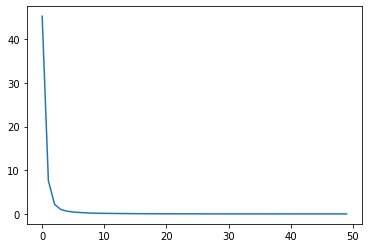

In [4]:
plt.plot(costs)
plt.show()